In [1]:
import numpy as np
import os

os.chdir('/home/jp4474/latent-abc-smc')
from matplotlib import pyplot as plt
from notebooks_lotka.utils import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
train_data = np.load('/home/jp4474/latent-abc-smc/data/train_data.npz')
val_data = np.load('/home/jp4474/latent-abc-smc/data/val_data.npz')

In [3]:
train_data_reshaped = train_data['simulations']
val_data_reshaped = val_data['simulations']

In [4]:
train_data_reshaped.shape

(5000, 15, 3, 80, 80)

In [7]:
# Flatten first two dimensions
train_data_flat = train_data_reshaped.reshape(-1, 3, 80, 80).transpose(0, 2, 3, 1)
val_data_flat = val_data_reshaped.reshape(-1, 3, 80, 80).transpose(0, 2, 3, 1)

In [8]:
train_data_flat.shape

(75000, 80, 80, 3)

In [9]:
np.savez('/home/jp4474/latent-abc-smc/data/train_data_reshaped', simulations=train_data_flat)
np.savez('/home/jp4474/latent-abc-smc/data/val_data_reshaped', simulations=train_data_flat)

In [8]:
means = np.mean(train_data_flat, axis=(0, 1, 2))
stds = np.std(train_data_flat, axis=(0, 1, 2))

In [9]:
print("Means:", means)
print("Stds:", stds)

Means: [3.59808002]
Stds: [2.98630883]


In [10]:
maxs = np.max(train_data_flat, axis=(0, 1, 2))
mins = np.min(train_data_flat, axis=(0, 1, 2))
print("Maxs:", maxs)
print("Mins:", mins)

Maxs: [12.]
Mins: [0.1]


# Plot CDF of simulations

In [11]:
import seaborn as sns

<Axes: ylabel='Count'>

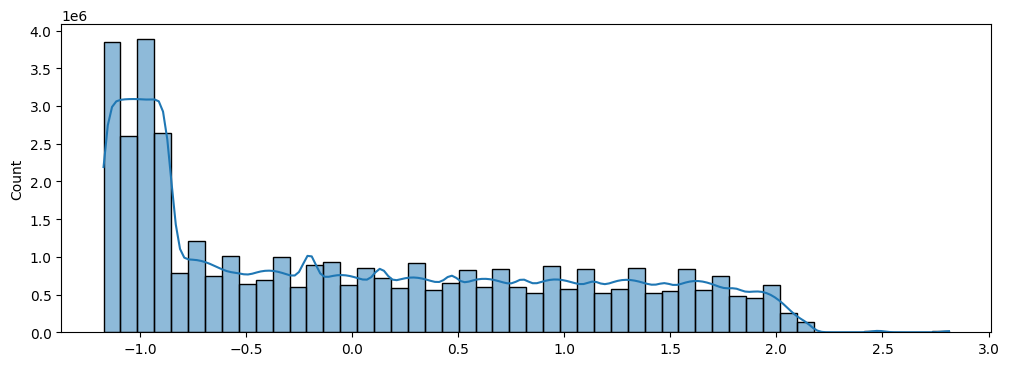

In [15]:
# plot histograms 
fig, axs = plt.subplots(1, 1, figsize=(12, 4))

x = train_data_flat.flatten()
x_scaled = (x - means[0]) / stds[0]
sns.histplot(x_scaled, bins=50, kde=True, ax=axs)

<Axes: ylabel='Count'>

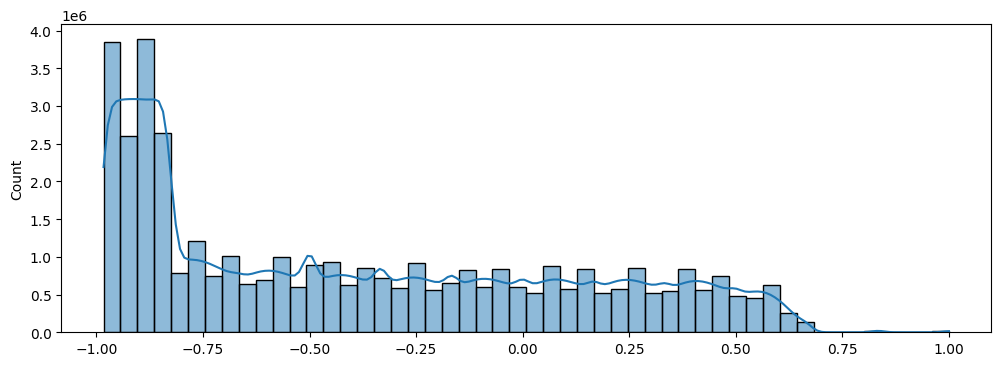

In [16]:
# plot histograms 
fig, axs = plt.subplots(1, 1, figsize=(12, 4))

x = train_data_flat.flatten()
x_scaled = ((x/12)-0.5)/0.5
sns.histplot(x_scaled, bins=50, kde=True, ax=axs)

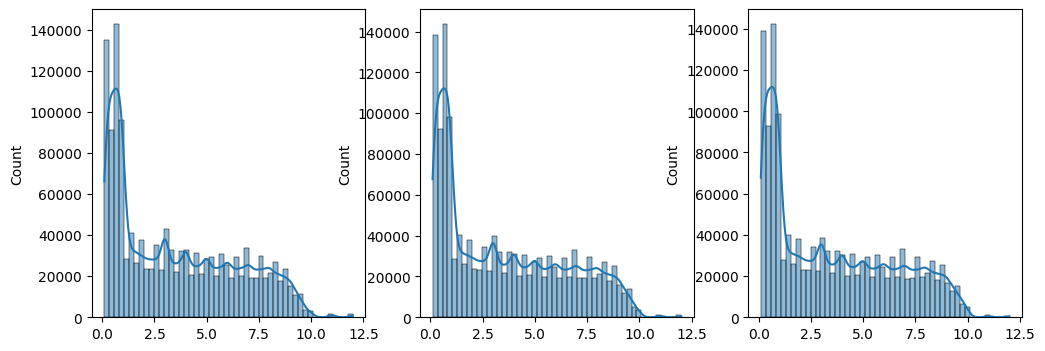

In [8]:
# plot histograms 
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    x = train_data_flat[:, i].flatten()
    #x_scaled = (x - mins[i]) / (maxs[i] - mins[i])
    sns.histplot(x, bins=50, kde=True, ax=axs[i])

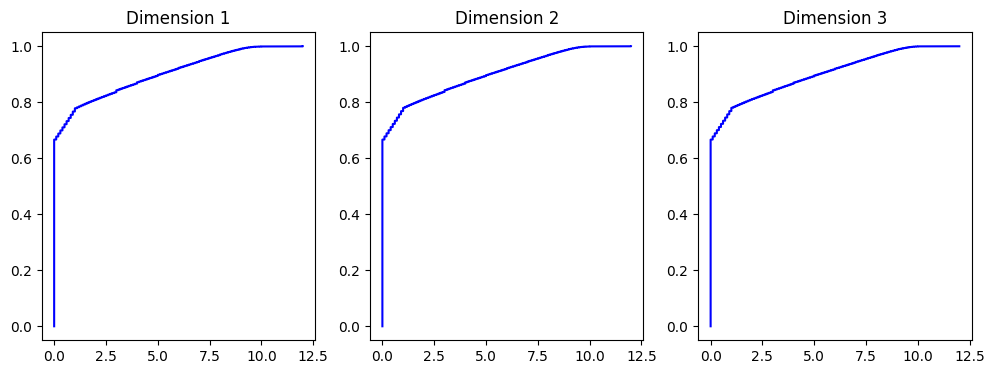

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    x = train_data_flat[:, i].flatten()
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    axs[i].plot(x_sorted, y, label='Empirical CDF', color='blue')
    axs[i].set_title(f'Dimension {i+1}')

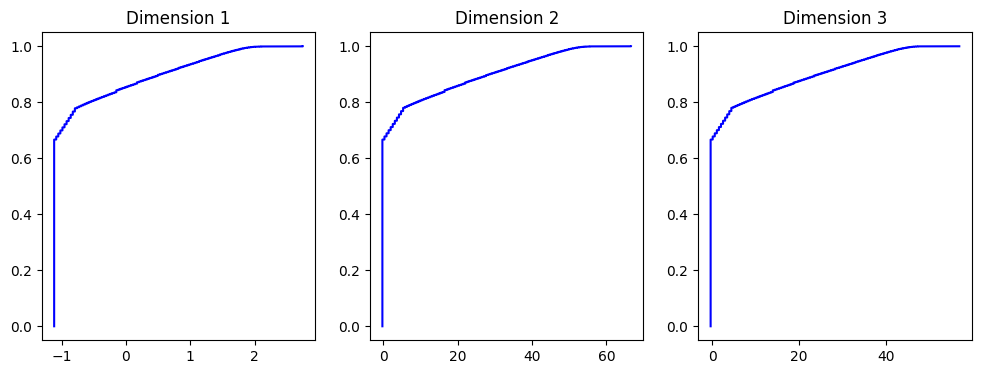

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    x = train_data_flat[:, i].flatten()
    x_scaled = (x - means[i]) / stds[i]
    x_sorted = np.sort(x_scaled)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    axs[i].plot(x_sorted, y, label='Empirical CDF', color='blue')
    axs[i].set_title(f'Dimension {i+1}')

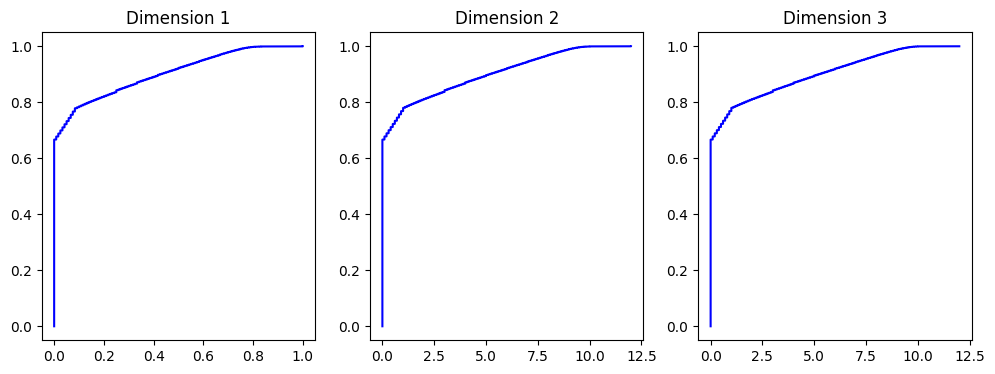

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    x = train_data_flat[:, i].flatten()
    x_scaled = (x - mins[i]) / (maxs[i] - mins[i])
    x_sorted = np.sort(x_scaled)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    axs[i].plot(x_sorted, y, label='Empirical CDF', color='blue')
    axs[i].set_title(f'Dimension {i+1}')

In [ ]:
np.quantile(train_data_flat[:, 0], [0.5, 0.6, 0.7, 0.8, 0.9])

array([0. , 0. , 0.4, 1.7, 5.1])

In [ ]:
(train_data_flat[:, 0] < 0.3).mean()

0.6882623809523809

In [ ]:
np.quantile(train_data_flat[:, 1], [0.5, 0.6, 0.7])

array([0. , 0. , 0.3])

In [ ]:
np.quantile(train_data_flat[:, 2], [0.5, 0.6, 0.7])

array([0. , 0. , 0.3])